In [1]:
import pandas as pd
import numpy as np


In [2]:
ref = pd.read_csv('data_sources/raw/reference_rooms.csv')
ref.head()

,hotel_id,lp_id,room_id,room_name
0,13484077,lp23e8ef,1142730702,Double or Twin Room
1,13487663,lp6554de34,1141927122,House
2,13462809,lp6556c3dc,1142722063,Room
3,13530116,lp6555450b,1141968275,Triple Room
4,13530071,lp6557a92c,1142513784,Apartment


In [3]:
upc = pd.read_csv('data_sources/raw/updated_core_rooms.csv')
upc.head()


,core_room_id,core_hotel_id,lp_id,supplier_room_id,supplier_name,supplier_room_name
0,1,506732,lp7bb6c,200979491,Expedia,Superior Double Room
1,2,509236,lp7c534,200998017,Expedia,"Deluxe Room, Balcony"
2,3,516326,lp7e0e6,201144757,Expedia,Female Dormitory- 3 Beds
3,4,495330,lp78ee2,201028863,Expedia,"Standard Apartment, 2 Bedrooms (6 people)"
4,5,970167,lpecdb7,218116045,Expedia,"Traditional Cottage, 2 Bedrooms, Harbor View"


=== ENHANCED EXPLORATORY DATA ANALYSIS FOR ROOM MATCHING API ===

=== DATASET OVERVIEW ===

Reference Data Shape: (100000, 4)

Reference Data Sample:
   hotel_id       lp_id     room_id            room_name
0  13484077    lp23e8ef  1142730702  Double or Twin Room
1  13487663  lp6554de34  1141927122                House
2  13462809  lp6556c3dc  1142722063                 Room
3  13530116  lp6555450b  1141968275          Triple Room
4  13530071  lp6557a92c  1142513784            Apartment

Reference Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   hotel_id   100000 non-null  int64 
 1   lp_id      100000 non-null  object
 2   room_id    100000 non-null  int64 
 3   room_name  100000 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.1+ MB
None

Reference Data Description:
            hotel_id       lp_id       room_id       

{'reference_features':           room_id                              room_name  length  word_count  \
 0      1142730702                    Double or Twin Room      19           4   
 1      1141927122                                  House       5           1   
 2      1142722063                                   Room       4           1   
 3      1141968275                            Triple Room      11           2   
 4      1142513784                              Apartment       9           1   
 ...           ...                                    ...     ...         ...   
 99995     2168409                      Two-Bedroom Suite      17           2   
 99996     2168411                     Deluxe Triple Room      18           3   
 99997     2168412  Deluxe Queen Room with Two Queen Beds      37           7   
 99998     2168413                 Classic Quadruple Room      22           3   
 99999     2168414                     Standard King Room      18           3   
 
    

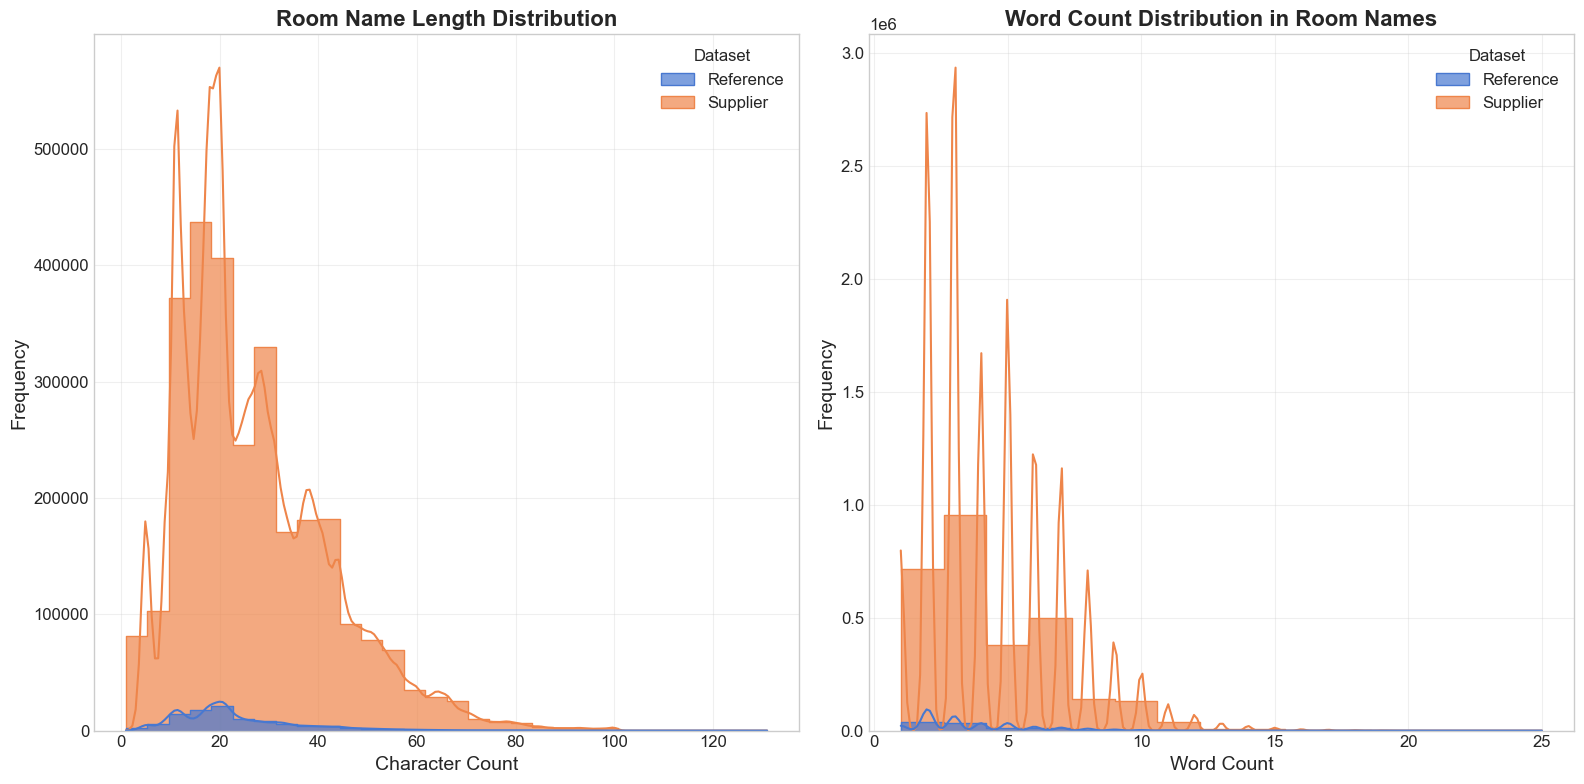

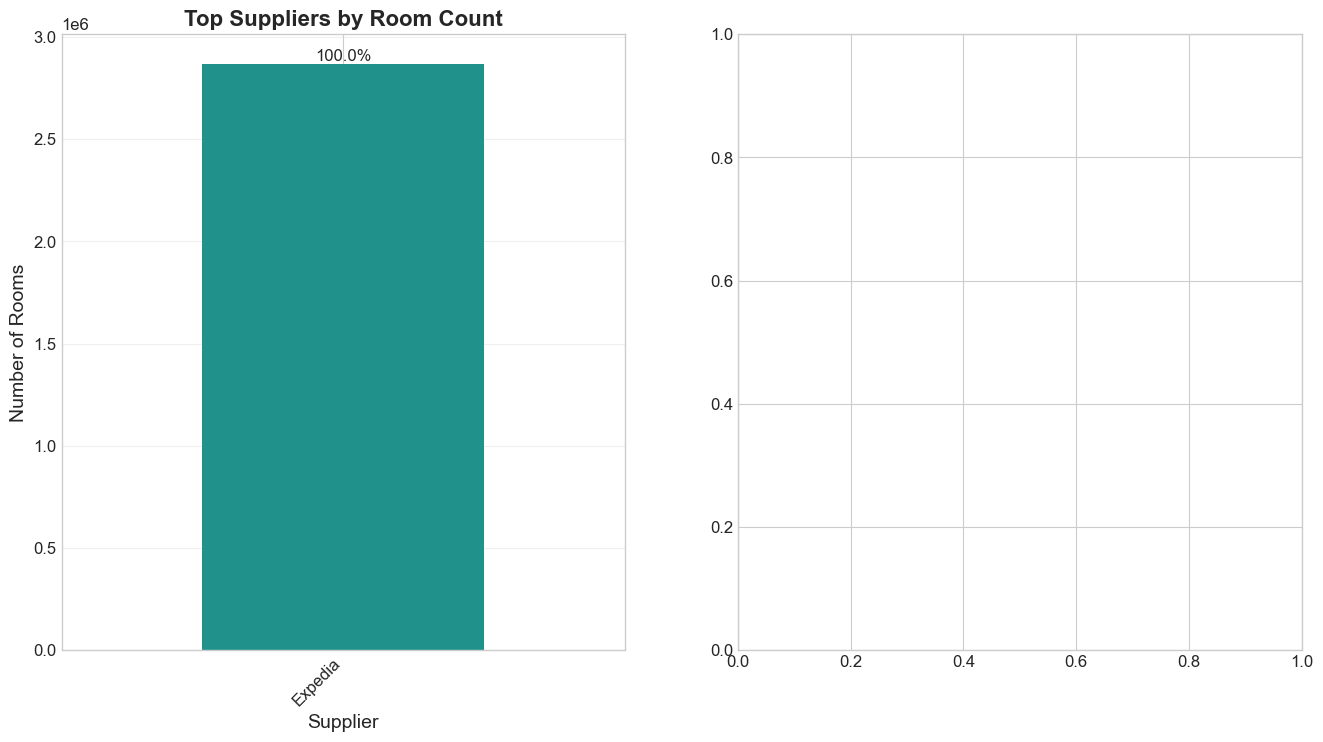

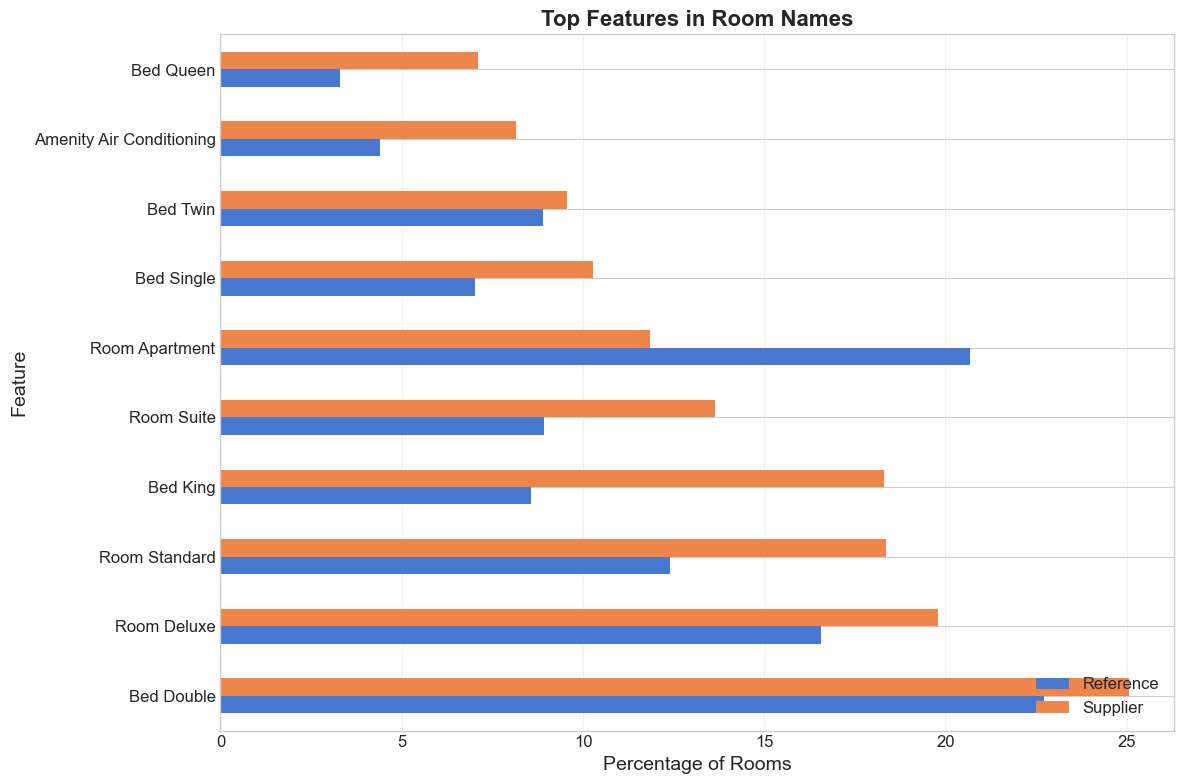

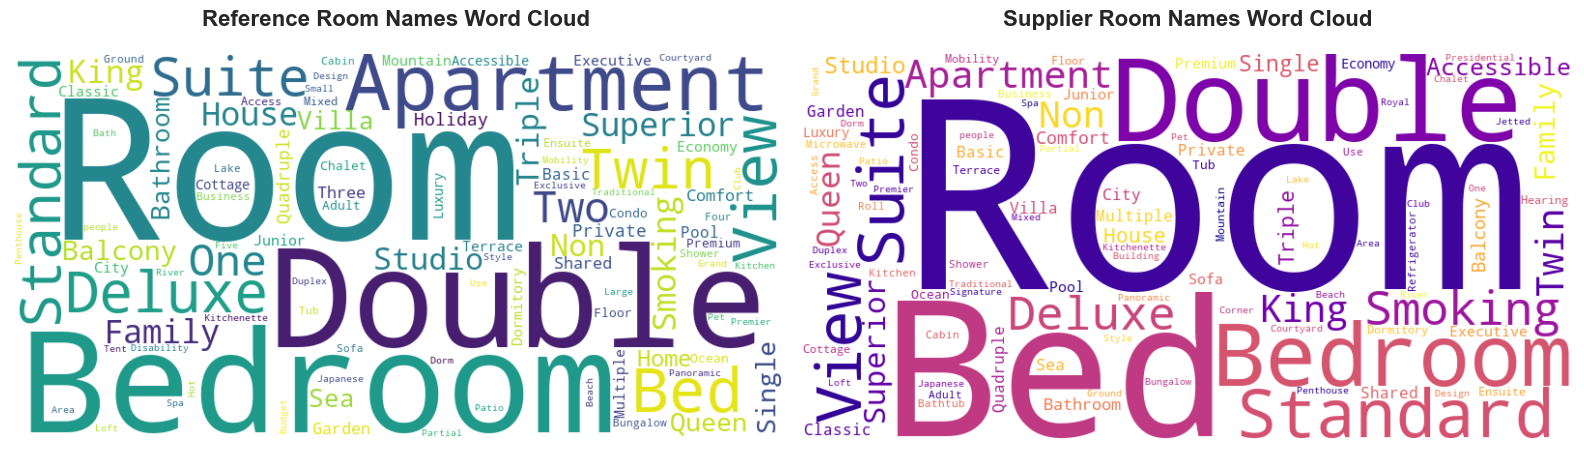

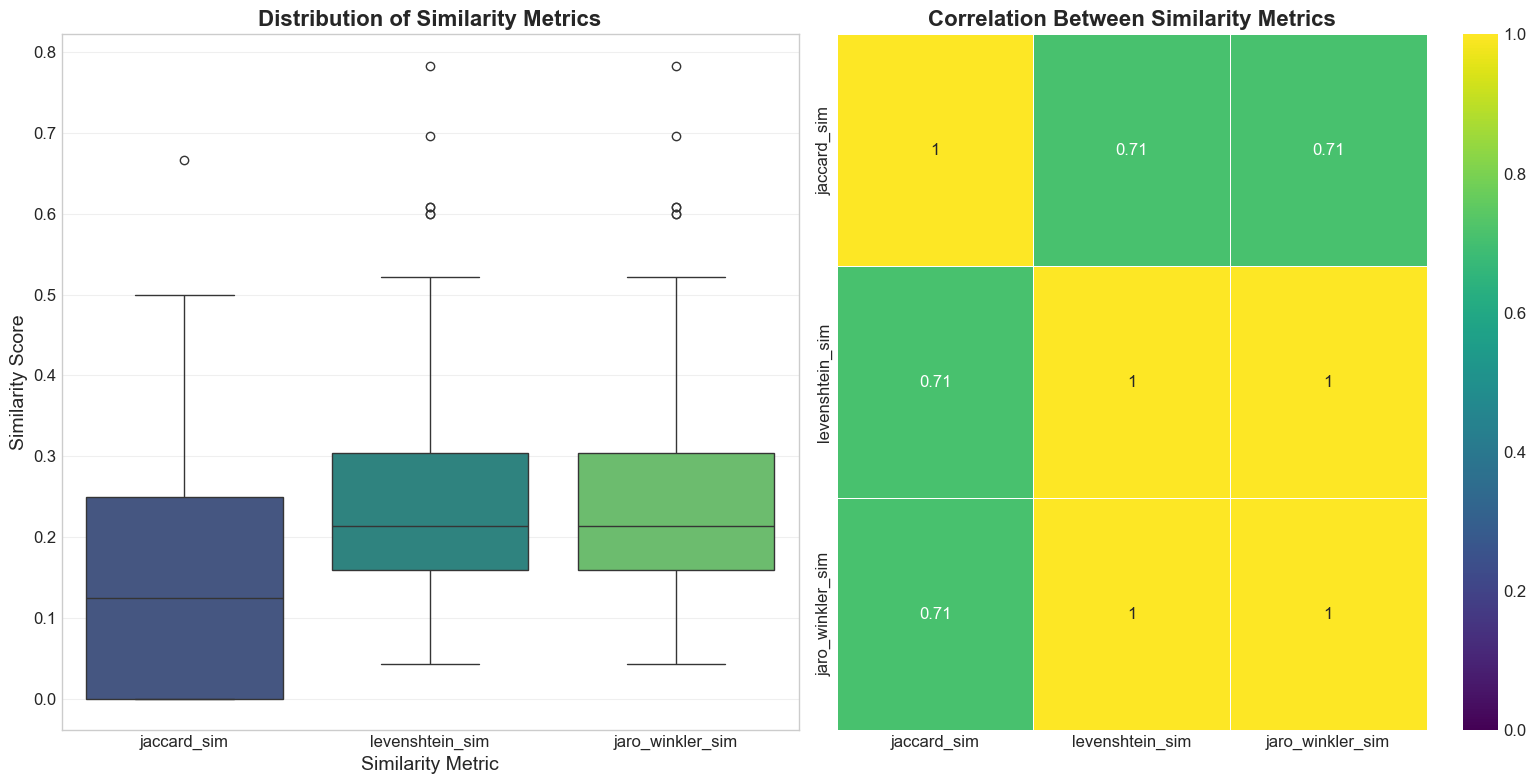

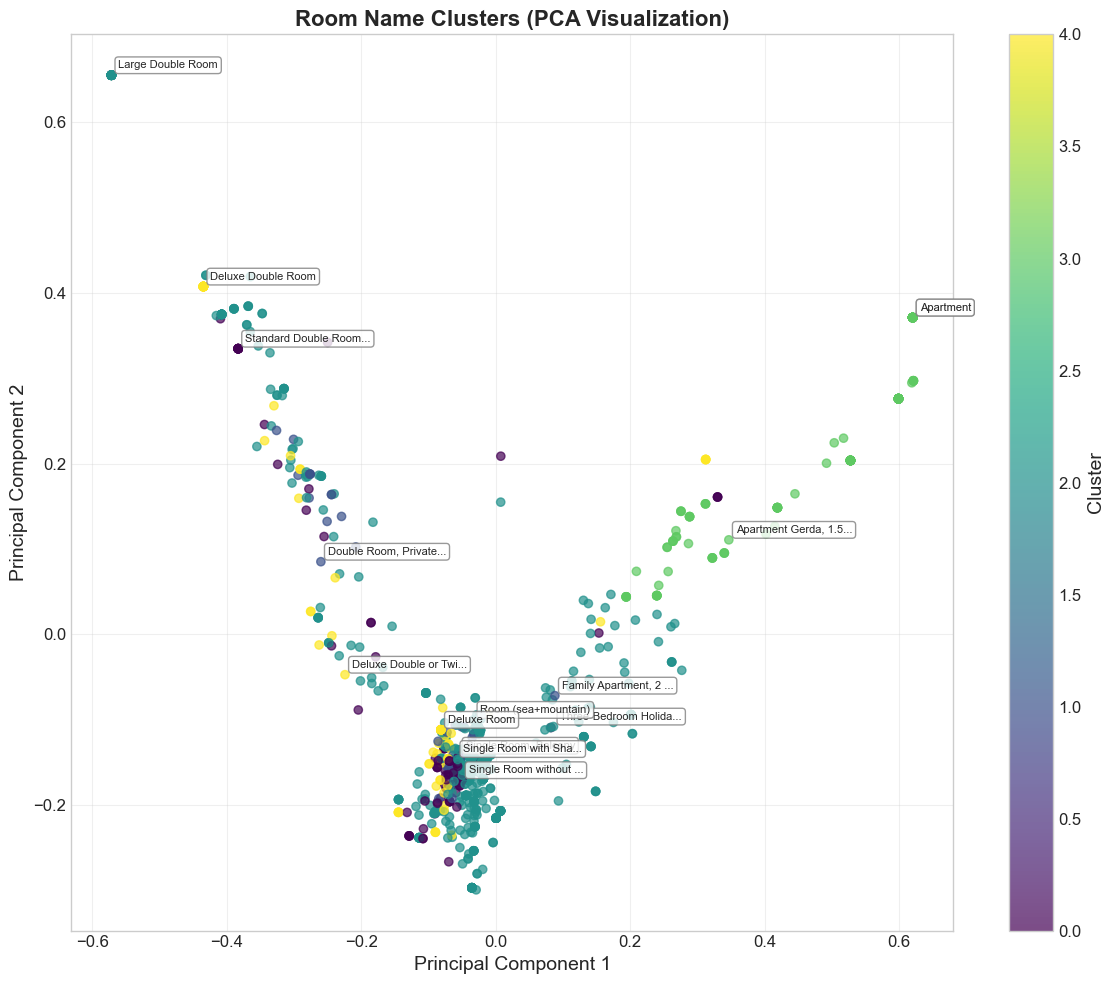

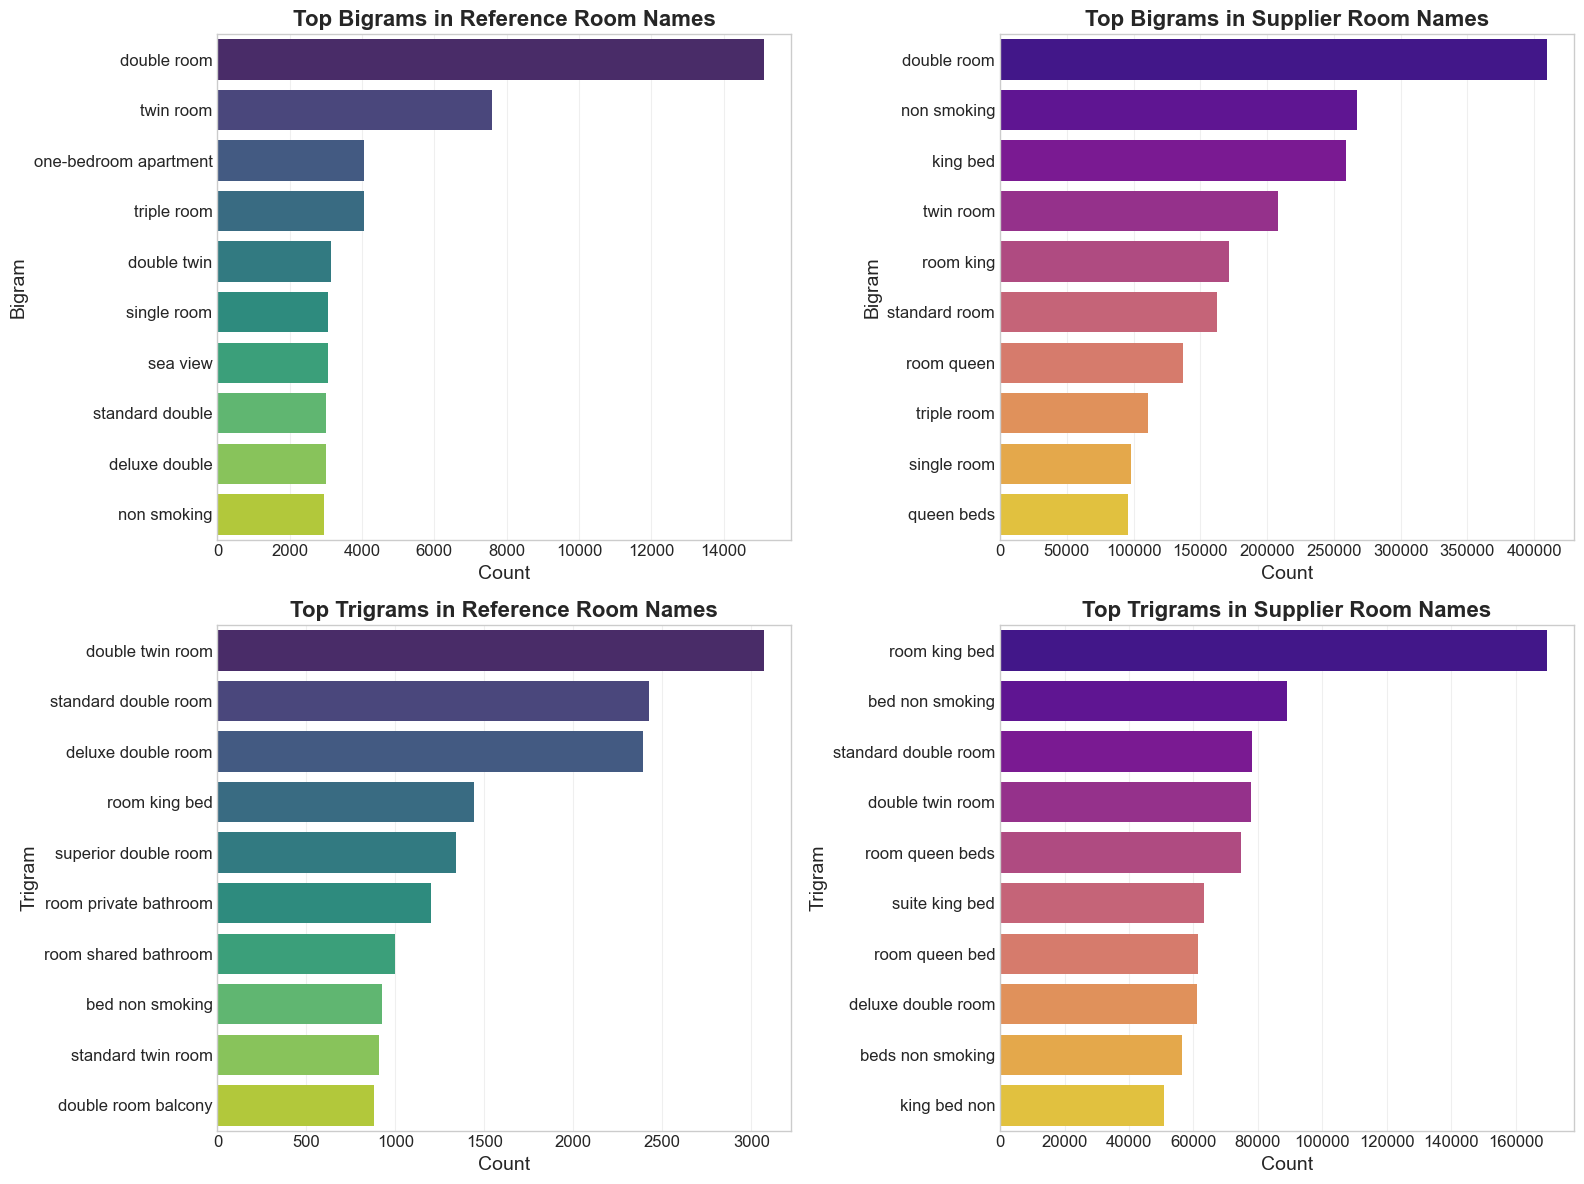

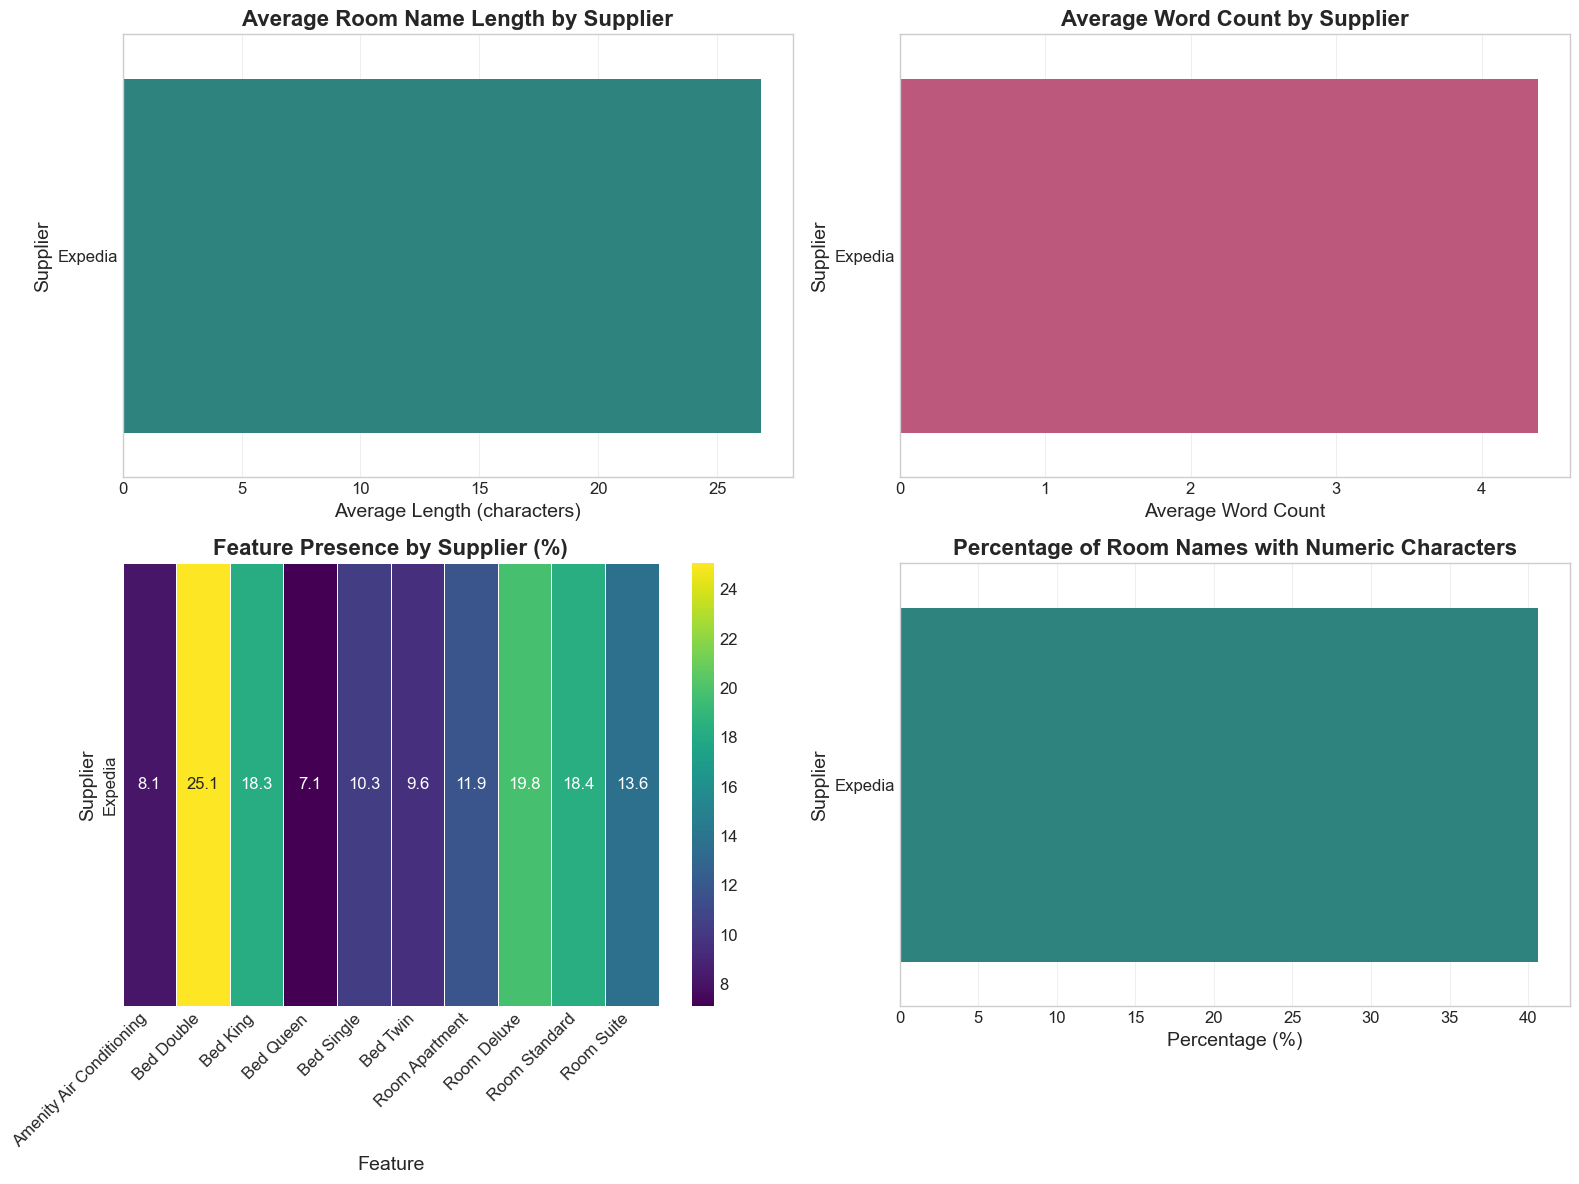

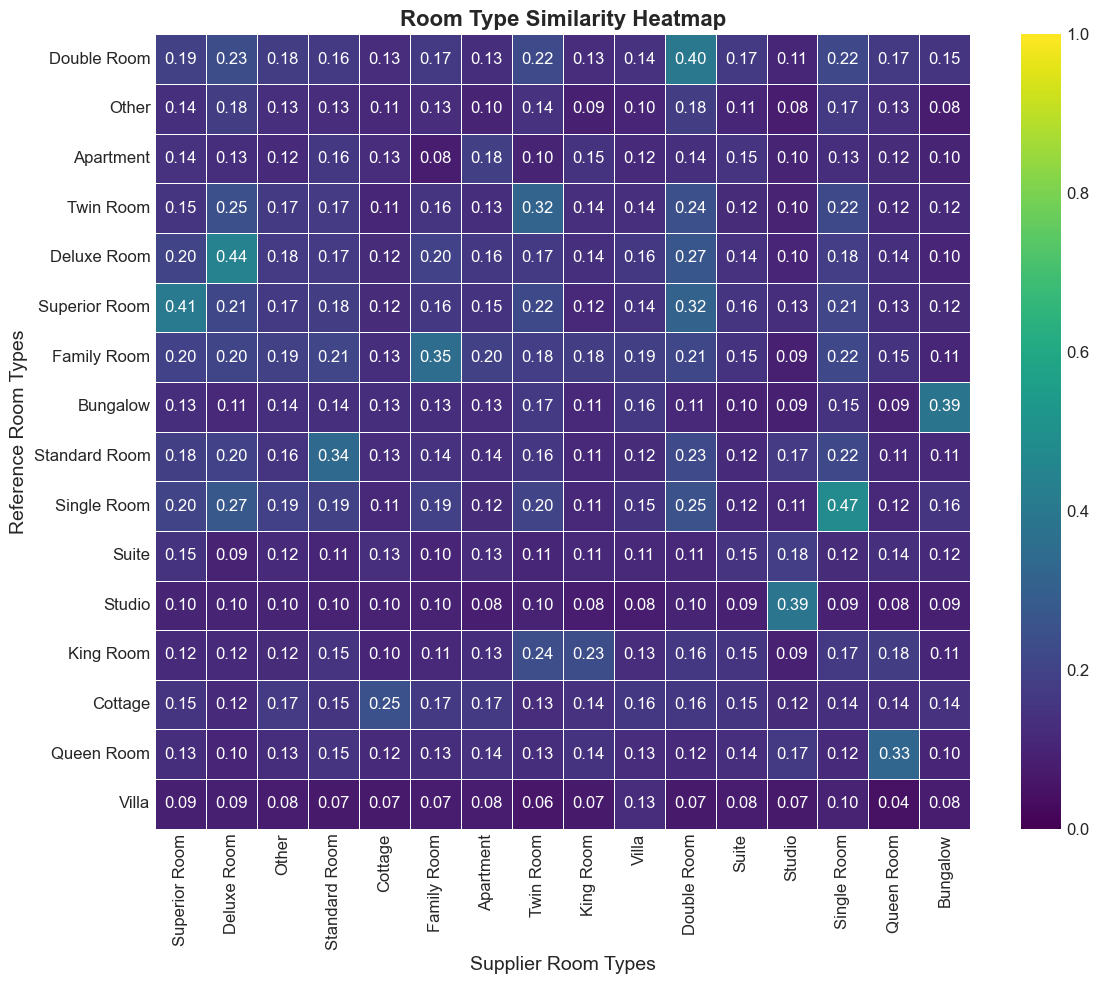

In [5]:
from hotel_mapping.data_processing.analysis import *
analysis(ref, upc)

In [4]:
from data_processing import main
reference_rooms, supplier_rooms = main(ref, upc)


In [5]:
from find_perfect_matches import find_perfect_matches
label_data = find_perfect_matches(similarity_threshold=0.7)

/Users/xinzhang/.pyenv/versions/realtime_interview_copilot/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/xinzhang/.pyenv/versions/realtime_interview_copilot/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


250 500 250


In [6]:
label_data.to_csv('matches.csv', index=False)

In [5]:
from bert_xgb import BertXGBoostRoomMatcher

/Users/xinzhang/.pyenv/versions/realtime_interview_copilot/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/xinzhang/.pyenv/versions/realtime_interview_copilot/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
ref_s = reference_rooms.iloc[0:10000]
supplier_s = supplier_rooms.iloc[0:30000]
#matcher = BertXGBoostRoomMatcher(bert_model_name='prajjwal1/bert-tiny', batch_size=32) 
matcher = BertXGBoostRoomMatcher(bert_model_name='sentence-transformers/all-MiniLM-L6-v2', batch_size=32) 

Loading BERT model: sentence-transformers/all-MiniLM-L6-v2
Using device: cpu


Training BERT+XGBoost room matching model...
Getting BERT embeddings...


BERT encoding: 100%|██████████| 938/938 [00:19<00:00, 47.27it/s]


Extracting structured features...
Generating synthetic training data...

Analyzing feature correlations...
Feature correlation heatmap saved as 'feature_correlation.png'

Mutual information scores between features and target variable:
                  Feature  Mutual Information Score
1             jaccard_sim                  0.215814
0                text_sim                  0.215730
6      normalized_lev_sim                  0.214102
3        ref_contains_sup                  0.210595
4        sup_contains_ref                  0.194408
2           token_overlap                  0.144467
7         room_type_match                  0.058074
8          bed_type_match                  0.047054
9              view_match                  0.039027
5            number_match                  0.012514
12     capacity_bed_match                  0.010264
10          view_conflict                  0.000505
11  capacity_people_match                  0.000361
Feature importance graph saved as 'fe

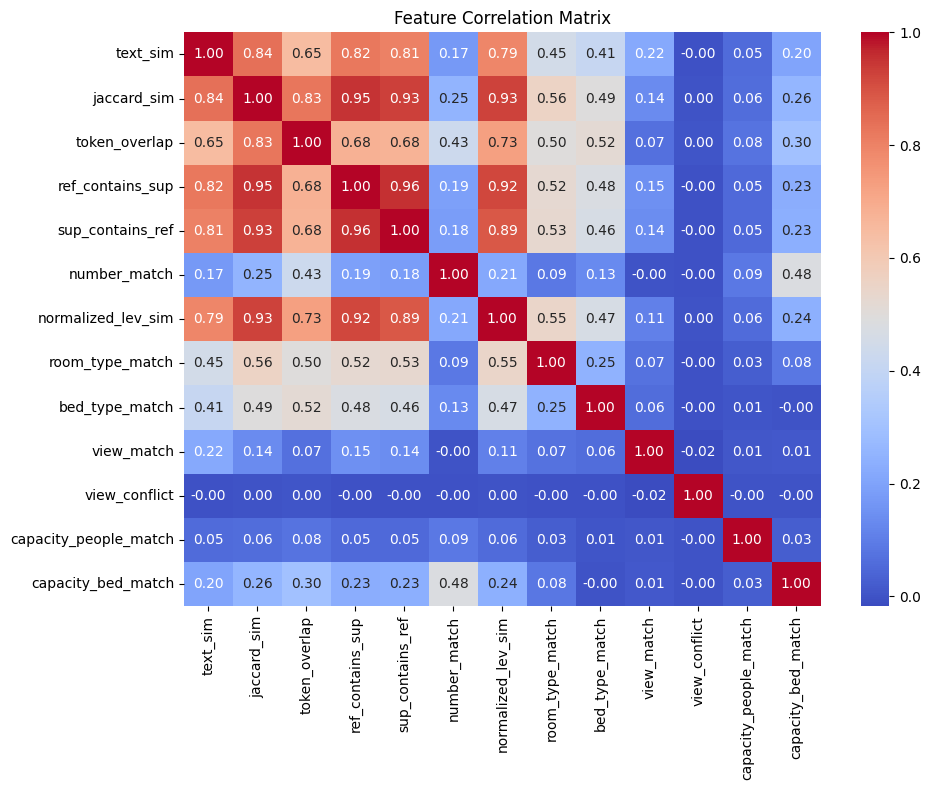

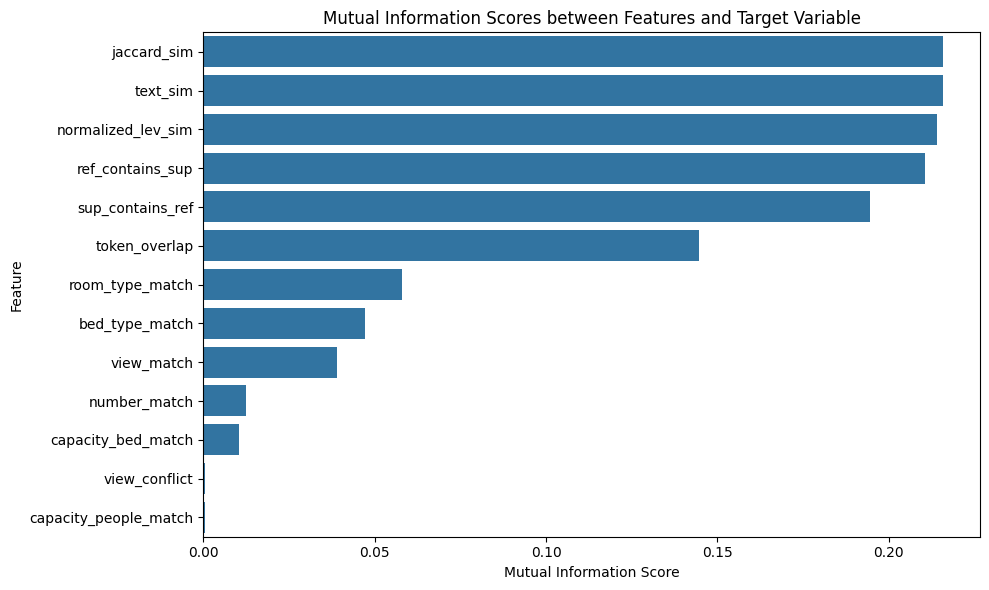

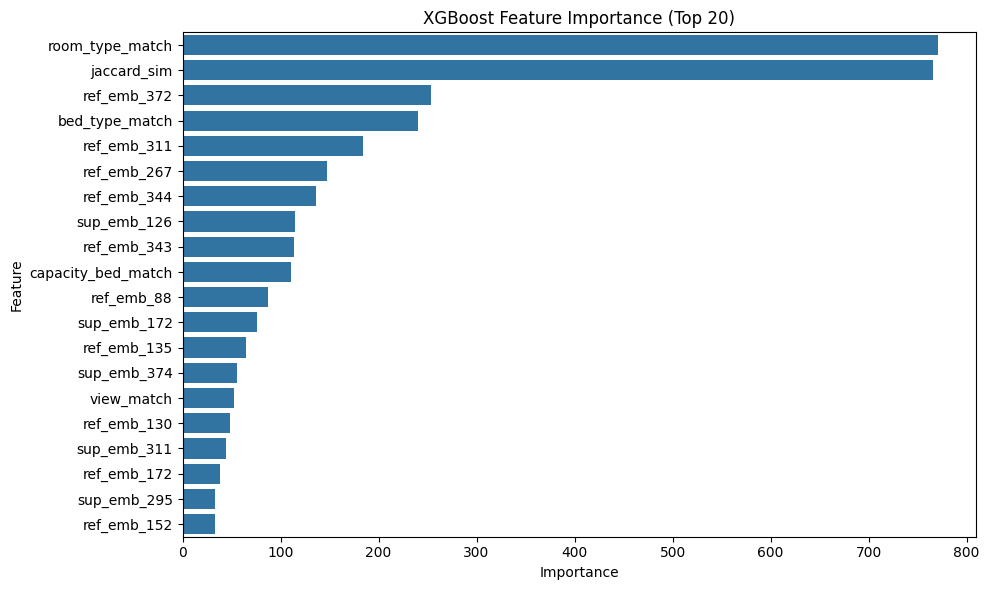

In [7]:
matcher.train(ref_s, supplier_s)

In [6]:
# matcher = BertXGBoostRoomMatcher(bert_model_name='prajjwal1/bert-tiny', batch_size=32) 
# matcher.load_model()    

加载BERT模型: prajjwal1/bert-tiny
使用设备: cpu


True

In [10]:
    # 预测匹配
ref_s = reference_rooms.iloc[0:1000]
supplier_sp = supplier_rooms.iloc[20000:21000]
matches = matcher.predict(ref_s, supplier_sp, threshold=0.9)
print(matches)

预测房间匹配...
获取BERT嵌入...


BERT编码: 100%|██████████| 32/32 [00:00<00:00, 46.31it/s]


提取结构化特征...
预测匹配...


预测匹配: 100%|██████████| 1000/1000 [00:16<00:00, 62.20it/s]

匹配完成! 耗时: 17.39秒
找到613个匹配
     reference_hotel_id  reference_room_id  \
0              13484077         1142730702   
1              13462809         1142722063   
2              13530116         1141968275   
3              13530071         1142513784   
4              13530384         1141970198   
..                  ...                ...   
608            13572897         1142832820   
609            13572897         1142832823   
610            13575457         1142836637   
611            13575457         1142836648   
612            13575457         1142836654   

                        reference_room_name  supplier_room_id  \
0                       Double or Twin Room         201371774   
1                                      Room         230705562   
2                               Triple Room         201688876   
3                                 Apartment         201891119   
4                                      Room         230705562   
..                             

In [8]:
label_data = pd.read_csv('matches.csv')
label_data['label'] = label_data['text_similarity'].apply(lambda x: 1 if x >0.9 else 0)

In [10]:
label_data.head()

,reference_hotel_id,reference_room_id,reference_room_name,reference_processed_name,supplier_room_id,supplier_room_name,supplier_processed_name,text_similarity,label
0,13431761,1142150973,"Superior Room, Mountain View",superior room mountain view,201006793,"Superior Room, Mountain View",superior room mountain view,1.0,1
1,13619916,1142062343,Grand Deluxe Room,grand deluxe room,230760088,Grand Deluxe Room,grand deluxe room,1.0,1
2,13645586,1142629660,"Room, 2 Queen Beds, Accessible, Bathtub",room 2 queen bed accessible bathtub,201030617,"Room, 2 Queen Beds, Accessible, Bathtub",room 2 queen bed accessible bathtub,1.0,1
3,13522822,1141957257,Honeymoon Suite,honeymoon suite,201155941,Honeymoon Suite,honeymoon suite,1.0,1
4,13485910,1142197380,Comfort Room,comfort room,218444778,Comfort Room,comfort room,1.0,1


In [11]:
def evaluate_model(matcher, labeled_data, threshold=0.5):
    """Evaluate model performance using labeled data"""
    print("Starting model evaluation...")
    
    # Prepare evaluation data
    eval_data = []
    
    # Make predictions for each labeled sample
    for i, row in labeled_data.iterrows():
        ref_id = row['reference_room_id']
        sup_id = row['supplier_room_id']
        true_label = row['label']
        
        # Get room names directly from labeled data
        ref_name = row['reference_processed_name']
        sup_name = row['supplier_processed_name']
        
        # Use model to predict match probability
        # Get BERT embeddings
        ref_embedding = matcher.get_bert_embeddings([ref_name])[0]
        sup_embedding = matcher.get_bert_embeddings([sup_name])[0]
        
        # Extract structured features
        ref_feature = matcher.extract_features(ref_name)
        sup_feature = matcher.extract_features(sup_name)
        
        # Create feature pair
        features = matcher.create_pair_features(
            ref_embedding, sup_embedding,
            ref_feature, sup_feature,
            ref_name, sup_name
        )
        
        # Apply feature mask (if available)
        if hasattr(matcher, 'feature_mask') and matcher.feature_mask is not None:
            features = features[matcher.feature_mask]
        
        # Predict
        import xgboost as xgb
        import numpy as np
        dmatrix = xgb.DMatrix(np.array([features]))
        prob = float(matcher.xgb_model.predict(dmatrix)[0])
        
        # Determine predicted label
        pred_label = 1 if prob >= threshold else 0
        
        # Add to evaluation data
        eval_data.append({
            'reference_id': ref_id,
            'reference_name': row['reference_room_name'],
            'supplier_id': sup_id,
            'supplier_name': row['supplier_room_name'],
            'true_label': true_label,
            'pred_prob': prob,
            'pred_label': pred_label,
            'correct': true_label == pred_label
        })
    
    # Convert to DataFrame
    eval_df = pd.DataFrame(eval_data)
    
    # Calculate evaluation metrics
    total = len(eval_df)
    correct = eval_df['correct'].sum()
    accuracy = correct / total
    
    # Calculate precision, recall and F1 score
    from sklearn.metrics import precision_recall_fscore_support
    precision, recall, f1, _ = precision_recall_fscore_support(
        eval_df['true_label'], 
        eval_df['pred_label'], 
        average='binary'
    )
    
    # Print evaluation results
    print("\nModel evaluation results:")
    print(f"Total samples: {total}")
    print(f"Correct predictions: {correct} ({accuracy*100:.2f}%)")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 score: {f1:.4f}")
    
    # Analyze incorrect predictions
    errors = eval_df[eval_df['correct'] == False]
    false_positives = errors[errors['pred_label'] == 1]
    false_negatives = errors[errors['pred_label'] == 0]
    
    print(f"\nFalse positives (predicted match but actually not matching): {len(false_positives)}")
    print(f"False negatives (predicted no match but actually matching): {len(false_negatives)}")
    
    # Show some error examples
    if len(false_positives) > 0:
        print("\nFalse positive examples:")
        for i, row in false_positives.head(3).iterrows():
            print(f"Reference room: {row['reference_name']}")
            print(f"Supplier room: {row['supplier_name']}")
            print(f"Prediction probability: {row['pred_prob']:.4f}")
            print("---")
    
    if len(false_negatives) > 0:
        print("\nFalse negative examples:")
        for i, row in false_negatives.head(3).iterrows():
            print(f"Reference room: {row['reference_name']}")
            print(f"Supplier room: {row['supplier_name']}")
            print(f"Prediction probability: {row['pred_prob']:.4f}")
            print("---")
    
    # Plot ROC curve and PR curve
    try:
        import matplotlib.pyplot as plt
        from sklearn.metrics import roc_curve, precision_recall_curve, auc
        
        # ROC curve
        fpr, tpr, _ = roc_curve(eval_df['true_label'], eval_df['pred_prob'])
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        
        # PR curve
        precision_curve, recall_curve, _ = precision_recall_curve(eval_df['true_label'], eval_df['pred_prob'])
        pr_auc = auc(recall_curve, precision_curve)
        
        plt.subplot(1, 2, 2)
        plt.plot(recall_curve, precision_curve, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend(loc="lower left")
        
        plt.tight_layout()
        plt.savefig('model_evaluation.png')
        print("\nEvaluation curves saved as 'model_evaluation.png'")
    except Exception as e:
        print(f"Unable to plot evaluation curves: {e}")
    
    # Return evaluation metrics
    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc if 'roc_auc' in locals() else None,
        'pr_auc': pr_auc if 'pr_auc' in locals() else None
    }
    
    return metrics, eval_df

Starting model evaluation...

Model evaluation results:
Total samples: 1000
Correct predictions: 857 (85.70%)
Precision: 0.8494
Recall: 0.9720
F1 score: 0.9066

False positives (predicted match but actually not matching): 123
False negatives (predicted no match but actually matching): 20

False positive examples:
Reference room: Shared Dormitory (For 9 people)
Supplier room: Shared Dormitory (8 people)
Prediction probability: 0.9334
---
Reference room: Villa, 1 Bedroom, Ocean View
Supplier room: Villa, 4 Bedrooms, Ocean View
Prediction probability: 0.9992
---
Reference room: Bed in 12-Bed Female Dormitory Room
Supplier room: Bed in 6-Bed Female Dormitory Room
Prediction probability: 0.9989
---

False negative examples:
Reference room: Luxury Suite, 2 Bedrooms, Ocean View
Supplier room: Two Bedroom Suite with Ocean View
Prediction probability: 0.2504
---
Reference room: Two Bedrooms Villa
Supplier room: 2 Bedroom Villa
Prediction probability: 0.0388
---
Reference room: Small Single Room

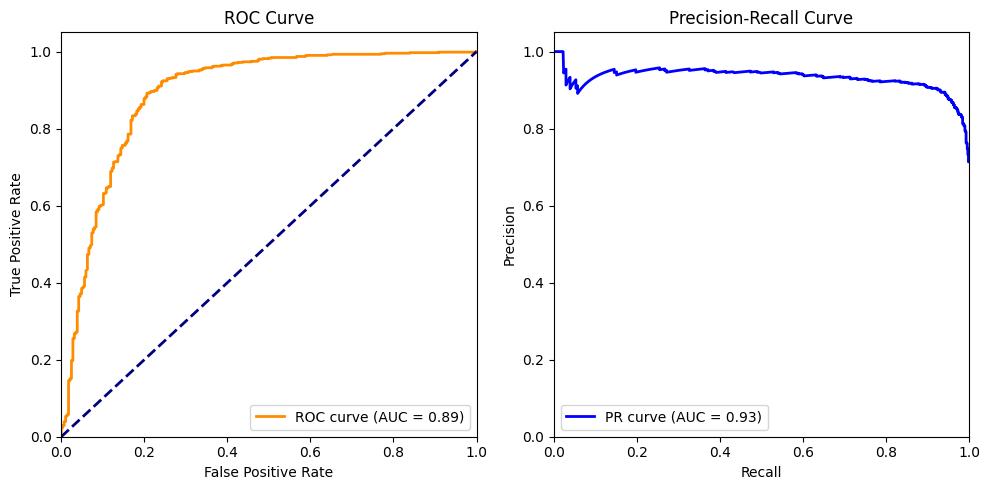

In [12]:
metrics, results = evaluate_model(matcher, label_data, threshold=0.5)

In [13]:
metrics

{'accuracy': np.float64(0.857),
 'precision': 0.8494492044063647,
 'recall': 0.9719887955182073,
 'f1': 0.9065969954278249,
 'roc_auc': np.float64(0.891892421304186),
 'pr_auc': np.float64(0.9325984108358946)}

In [3]:
from bert_xgb import BertXGBoostRoomMatcher
import pandas as pd

In [14]:
find_label_data1 = pd.read_csv('fine_label_data.csv')
find_label_data1['label'] = find_label_data1['text_similarity'].apply(lambda x: 1 if x >=0.9 else 0)

In [7]:
matcher = BertXGBoostRoomMatcher(bert_model_name='sentence-transformers/all-MiniLM-L6-v2', batch_size=32) 
matcher.load_model() 

加载BERT模型: sentence-transformers/all-MiniLM-L6-v2
使用设备: cpu


True

Starting XGBoost hyperparameter tuning...
Preparing training data...


处理标记数据: 100%|██████████| 648/648 [00:13<00:00, 49.23it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Preparation complete, total 2155 samples, with 503 positive samples
Feature count: 781

Performing feature selection...

Mutual information scores between features and target variable:
                  Feature  Mutual Information Score
0                text_sim                  0.445990
1             jaccard_sim                  0.426468
6      normalized_lev_sim                  0.369939
2           token_overlap                  0.310131
3        ref_contains_sup                  0.242261
4        sup_contains_ref                  0.214352
7         room_type_match                  0.086189
9              view_match                  0.061604
8          bed_type_match                  0.058176
5            number_match                  0.031672
12     capacity_bed_match                  0.020120
10          view_conflict                  0.007915
11  capacity_people_match                  0.001352
Removing feature with low mutual information: view_conflict
Removing feature with low m

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Best parameters: {'subsample': 0.8, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
Best F1 score: 0.9192
Training final model with best parameters...
[0]	train-logloss:0.50970	val-logloss:0.49547
[10]	train-logloss:0.28672	val-logloss:0.28953
[20]	train-logloss:0.18235	val-logloss:0.19525
[30]	train-logloss:0.12369	val-logloss:0.14398
[40]	train-logloss:0.08834	val-logloss:0.11633
[50]	train-logloss:0.06580	val-logloss:0.09755
[60]	train-logloss:0.05090	val-logloss:0.08753
[70]	train-logloss:0.04077	val-logloss:0.08156
[80]	train-logloss:0.03423	val-logloss:0.07739
[90]	train-logloss:0.02945	val-logloss:0.07547
[100]	train-logloss:0.02593	val-logloss:0.07500
[110]	train-logloss:0.02330	val-logloss:0.07341
[120]	train-logloss:0.02115	val-logloss:0.07289
[130]	train-logloss:0.01941	val-logloss:0.07356
[140]	train-logloss:0.01797	val-logloss:0.07372
[143]	train-logloss:0.01758	val-logloss:0.07416
Final model performance: Precision=0.8824

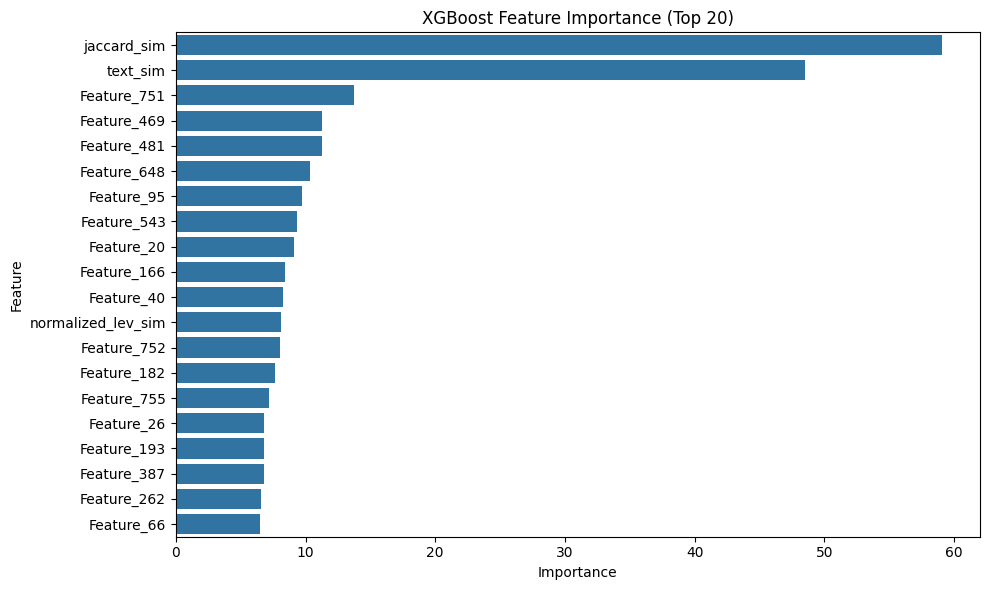

In [15]:
matcher.tune_hyperparameters(find_label_data1, new_model_path='./fine_tuned_model.joblib')

Starting model evaluation...

Model evaluation results:
Total samples: 1000
Correct predictions: 889 (88.90%)
Precision: 0.8736
Recall: 0.9874
F1 score: 0.9270

False positives (predicted match but actually not matching): 102
False negatives (predicted no match but actually matching): 9

False positive examples:
Reference room: Shared Dormitory (For 9 people)
Supplier room: Shared Dormitory (8 people)
Prediction probability: 0.9466
---
Reference room: Villa, 1 Bedroom, Ocean View
Supplier room: Villa, 4 Bedrooms, Ocean View
Prediction probability: 0.9920
---
Reference room: Bed in 12-Bed Female Dormitory Room
Supplier room: Bed in 6-Bed Female Dormitory Room
Prediction probability: 0.7866
---

False negative examples:
Reference room: Comfort House, 3 Bedrooms
Supplier room: Comfort Apartment, 3 Bedrooms
Prediction probability: 0.4733
---
Reference room: Townhome, 5 Bedrooms
Supplier room: Luxury Townhome, 5 Bedrooms
Prediction probability: 0.2176
---
Reference room: Economy Double Room

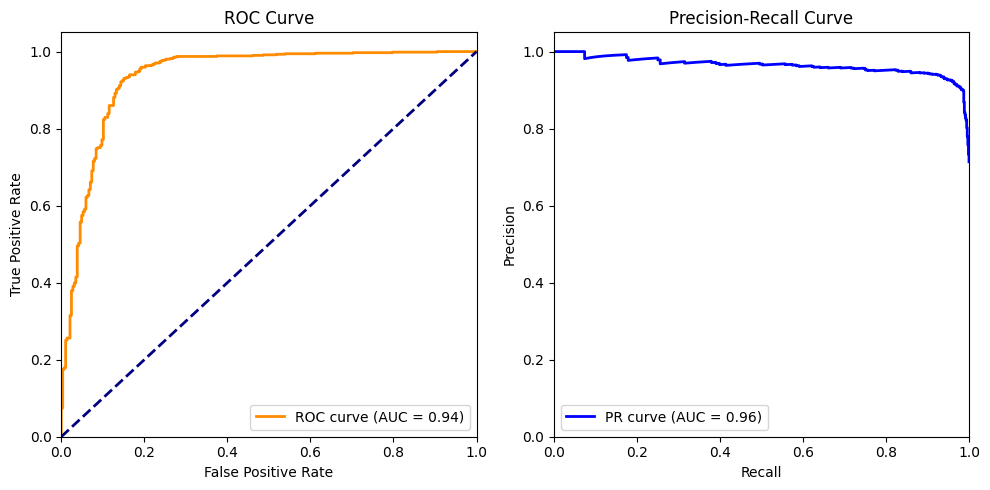

In [16]:
metrics, results = evaluate_model(matcher, label_data, threshold=0.5)

In [17]:
metrics

{'accuracy': np.float64(0.889),
 'precision': 0.8736059479553904,
 'recall': 0.9873949579831933,
 'f1': 0.9270216962524654,
 'roc_auc': np.float64(0.9354346633758397),
 'pr_auc': np.float64(0.9639088783328794)}

In [ ]:
{'accuracy': np.float64(0.857),
 'precision': 0.8494492044063647,
 'recall': 0.9719887955182073,
 'f1': 0.9065969954278249,
 'roc_auc': np.float64(0.891892421304186),
 'pr_auc': np.float64(0.9325984108358946)}

In [26]:
results.iloc[988:993]

,reference_id,reference_name,supplier_id,supplier_name,true_label,pred_prob,pred_label,correct
988,182288807,Comfort Triple Room with Shower,200951876,Deluxe Double Room with Shower,0,0.111901,0,True
989,1143633539,"Deluxe Room, Multiple Beds, Refrigerator, Moun...",201316378,"Comfort Studio Suite, 1 Queen Bed, Refrigerato...",0,0.014429,0,True
990,1143569342,Standard Room (White),201917987,Standard Room,0,0.193498,0,True
991,1142737407,Suite (Coach House),201289561,Suite House,0,0.130304,0,True
992,793806704,Deluxe Queen Studio,200525743,Standard Queen Studio,0,0.079433,0,True


In [4]:
from memory_optimized_matcher import MemoryOptimizedRoomMatcher

/Users/xinzhang/.pyenv/versions/realtime_interview_copilot/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [5]:
len(upc)

2869056

In [6]:
matcher = MemoryOptimizedRoomMatcher({
    'batch_size': 2000,  # 使用较小的批次大小
    'embedding_model': 'all-MiniLM-L6-v2',  # 使用更小的模型
    'use_sentence_transformer': True,  # 如果内存仍然是问题，可以设置为 False
    'embedding_dim': 50  # 如果使用 TF-IDF，控制维度
})
# Process data
print("Training model...")
upc_s = upc.head(10000)
metrics = matcher.train_model(ref, upc_s)
print(f"Training complete. Metrics: {metrics}")


Training model...
Training room matching model...
Generating match labels...
Generating match labels with batched processing...


/Users/xinzhang/.pyenv/versions/realtime_interview_copilot/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/xinzhang/.pyenv/versions/realtime_interview_copilot/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading sentence transformer model: all-MiniLM-L6-v2
Generating reference embeddings with Sentence Transformer...


Batches: 100%|██████████| 3125/3125 [00:50<00:00, 61.67it/s]


Processing supplier data in 5 batches of size 2000...


Batches:   0%|          | 0/5 [09:14<?, ?it/s]


KeyboardInterrupt: 